<a href="https://colab.research.google.com/github/RabiahAziz/Final-Project/blob/main/final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#College Grads Data
Rabiah Aziz and Areebah Aziz

4/10/23

CMPU-101

#Problem Statement:

We will first attempt to answer how majors effect employment rates. Then we will try to understand how major categories effect full-time and part-time employment. We will see the relationship between sex demographics of majors and the likelihood to get low-wage jobs. Lastly we will analyze which major has the greatest amount of non-college jobs.


#Data Processing:

Load the dataset and perform any appropriate clean-up, selecting and/or renaming columns, filling in or filtering missing values, transforming values, etc. Briefly describe what your code is doing in text cells.



In [ ]:
%pip install -qq ipytest

import ipytest

ipytest.autoconfig()

from datascience import *

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
URL = "https://docs.google.com/spreadsheets/d/16YKbLsssrtzFqVNPe1oMSYaqXRwJ_YNWZdhbd7FGn88/export?format=csv"
college_grads = Table.read_table(URL)
college_grads

rank,major_code,major_name,total,men,women,major_type,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,558,133,340,16,0.0240964,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,1069,150,692,40,0.0501253,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,ACTUARIAL SCIENCE,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,ASTRONOMY AND ASTROPHYSICS,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,MECHANICAL ENGINEERING,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,ELECTRICAL ENGINEERING,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170


In [ ]:
URL = "https://docs.google.com/spreadsheets/d/1TF4ElD1swwec4H_nW0P4KxvaKJ3FucHupIUpeFoFiEE/export?format=csv"
cleaned_college_grads = Table.read_table(URL)
cleaned_college_grads

total,men,women,major_type,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,college_jobs,non_college_jobs,low_wage_jobs
75620,40357,35263,Agriculture & Natural Resources,3.64741,1068,63794,55585,15470,41891,3486,18677,33217,7414
357130,134390,222740,Arts,4.82926,3260,288114,207773,114791,153111,28228,94785,163720,60116
453862,184919,268943,Biology & Life Science,8.2207,2317,302797,240377,116736,165802,22854,151233,127182,42742
1302376,667852,634524,Business,6.28157,15505,1088742,988870,196936,790425,79877,148538,496570,126788
392601,131921,260680,Communications & Journalism,2.63354,4508,330660,273330,89817,214228,26852,86556,172992,49595
299008,208725,90283,Computers & Mathematics,3.42949,2860,237894,207545,53270,159156,18373,137859,74463,16136
559129,103526,455603,Education,11.9761,4742,479839,398059,120593,288031,24969,338713,121761,40870
537583,408307,129276,Engineering,6.92777,4926,420372,381867,85136,288952,29817,269767,102383,25079
463230,75517,387713,Health,9.54182,3914,372147,294819,114592,228418,22213,245441,110496,31270
713468,272846,440622,Humanities & Liberal Arts,9.47686,5340,544118,416939,214030,295561,51101,192650,276532,94240


First, we'll make the column titles lowercase.




In [ ]:
lowercase_table = [t.title() for t in college_grads.column("major_name")]
clean_table = college_grads.with_column("major_name", lowercase_table)
clean_table

rank,major_code,major_name,total,men,women,major_type,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
1,2419,Petroleum Engineering,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,Mining And Mineral Engineering,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,Metallurgical Engineering,856,725,131,Engineering,0.153037,3,648,558,133,340,16,0.0240964,73000,50000,105000,456,176,0
4,2417,Naval Architecture And Marine Engineering,1258,1123,135,Engineering,0.107313,16,758,1069,150,692,40,0.0501253,70000,43000,80000,529,102,0
5,2405,Chemical Engineering,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,Nuclear Engineering,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,Actuarial Science,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,Astronomy And Astrophysics,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,Mechanical Engineering,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,Electrical Engineering,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170


There is one row, with major name Military Technologies, that has 0 employed but 111 full-time college grads.  This is because people in the military aren't employed because they're not being paid, but they are working, or volunteering, full-time. Although this isn't visible right now, it could pose a problem in the future.
We'll filter the data so there aren't any majors that have 0 employed but still have full-time/part-time workers. In this case, all the majors have either full-time or part-time workers, just Military technologies has 0 employed, so we will filter based on that.

In [ ]:
no_zero = clean_table.where("employed", are.not_equal_to(0))
no_zero

rank,major_code,major_name,total,men,women,major_type,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
1,2419,Petroleum Engineering,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,Mining And Mineral Engineering,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,Metallurgical Engineering,856,725,131,Engineering,0.153037,3,648,558,133,340,16,0.0240964,73000,50000,105000,456,176,0
4,2417,Naval Architecture And Marine Engineering,1258,1123,135,Engineering,0.107313,16,758,1069,150,692,40,0.0501253,70000,43000,80000,529,102,0
5,2405,Chemical Engineering,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,Nuclear Engineering,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,Actuarial Science,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,Astronomy And Astrophysics,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,Mechanical Engineering,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,Electrical Engineering,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170


I am going to remove any low wage jobs that are zero because then I can't find the proportion of women and men in that job, and it will affect my results.

In [ ]:
cleaned_table = no_zero.where("low_wage_jobs", lambda t: t > 0)
cleaned_table

rank,major_code,major_name,total,men,women,major_type,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
1,2419,Petroleum Engineering,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,Mining And Mineral Engineering,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
5,2405,Chemical Engineering,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,Nuclear Engineering,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,Actuarial Science,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,Astronomy And Astrophysics,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,Mechanical Engineering,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,Electrical Engineering,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170
11,2407,Computer Engineering,41542,33258,8284,Engineering,0.199413,399,32506,30315,5146,23621,2275,0.0654093,60000,45000,75000,23694,5721,980
12,2401,Aerospace Engineering,15058,12953,2105,Engineering,0.139793,147,11391,11106,2724,8790,794,0.0651621,60000,42000,70000,8184,2425,372


#Analysis:


###Question 1:

How do majors affect employment rates?

We will use the data table with only the combined major types because we want to analyze the overall majors and not the major names.

In [ ]:
major_emp = cleaned_college_grads.select("major_type", "employed", "unemployed", "total")
major_emp.sort("employed", True)

major_type,employed,unemployed,total
Business,1088742,79877,1302376
Humanities & Liberal Arts,544118,51101,713468
Education,479839,24969,559129
Engineering,420372,29817,537583
Social Science,401493,42975,529966
Psychology & Social Work,380344,33292,481007
Health,372147,22213,463230
Communications & Journalism,330660,26852,392601
Biology & Life Science,302797,22854,453862
Arts,288114,28228,357130


Right now, Business has the highest amount of employed college grads, but it also has a high total amount of college grads. Lets put the number employed in proportion to the number that actually majored in each by creating a new column that shows the ratio of employed/total.

In [ ]:
def ratio_employed(col1: str, col2: str) -> float:
    """Return the major with the highest ratio of employed grads to the number taking the major."""
    return col2 / col1 * 100

In [ ]:
ratio_employment = major_emp.with_columns("percent_employed",
                                          major_emp.apply(ratio_employed,
                                                          "total", "employed"))
ratio_employment

major_type,employed,unemployed,total,percent_employed
Agriculture & Natural Resources,63794,3486,75620,84.3613
Arts,288114,28228,357130,80.6748
Biology & Life Science,302797,22854,453862,66.7157
Business,1088742,79877,1302376,83.5966
Communications & Journalism,330660,26852,392601,84.2229
Computers & Mathematics,237894,18373,299008,79.5611
Education,479839,24969,559129,85.819
Engineering,420372,29817,537583,78.1967
Health,372147,22213,463230,80.3374
Humanities & Liberal Arts,544118,51101,713468,76.2638


In [ ]:
ratio_unemployed = ratio_employment.with_columns("percent_unemployed",
                                                 ratio_employment.apply(ratio_employed,
                                                                        "total", "unemployed"))
ratio_unemployed

major_type,employed,unemployed,total,percent_employed,percent_unemployed
Agriculture & Natural Resources,63794,3486,75620,84.3613,4.60989
Arts,288114,28228,357130,80.6748,7.90412
Biology & Life Science,302797,22854,453862,66.7157,5.03545
Business,1088742,79877,1302376,83.5966,6.13318
Communications & Journalism,330660,26852,392601,84.2229,6.83951
Computers & Mathematics,237894,18373,299008,79.5611,6.14465
Education,479839,24969,559129,85.819,4.4657
Engineering,420372,29817,537583,78.1967,5.54649
Health,372147,22213,463230,80.3374,4.79524
Humanities & Liberal Arts,544118,51101,713468,76.2638,7.16234


Now we can create a function that will return the name of the highest employed major given two columns.

In [ ]:
%%ipytest
def retrieve_name(t: Table, col1 : str, col2 : str) -> str:
    """Return the name of the highest employed major based on the ratio of employed to majoring."""
    ratio = t.sort(col2, True)
    return ratio.first(col1)

def test_retrieve_name():
    assert retrieve_name(ratio_unemployed, "major_type", "percent_employed") == "Education"


.                                                                                            [100%]
1 passed in 0.02s


In [ ]:
retrieve_name(ratio_unemployed, "major_type", "percent_employed")

'Education'

The highest employed major across all major names is Education.

In [ ]:
retrieve_name(ratio_unemployed, "major_type", "percent_unemployed")

'Social Science'

So, the highest unemployed major is Social Science.

###Question 2
How do major categories affect full-time and part-time employment rates?

There is a difference between the type of jobs that college grads can take once they are employed. Some are full-time and others are part-time, which could indicate if grads jumped right into working or if they decided to uptake other hobbies/jobs after college. This time, we'll look at major names to get a clearer idea of what type of jobs the college grads can occupy.


In [ ]:
type_emp = cleaned_table.select("major_name", "major_type", "total", "employed", "full_time", "part_time", "full_time_year_round")
type_emp

major_name,major_type,total,employed,full_time,part_time,full_time_year_round
Petroleum Engineering,Engineering,2339,1976,1849,270,1207
Mining And Mineral Engineering,Engineering,756,640,556,170,388
Chemical Engineering,Engineering,32260,25694,23170,5180,16697
Nuclear Engineering,Engineering,2573,1857,2038,264,1449
Actuarial Science,Business,3777,2912,2924,296,2482
Astronomy And Astrophysics,Physical Sciences,1792,1526,1085,553,827
Mechanical Engineering,Engineering,91227,76442,71298,13101,54639
Electrical Engineering,Engineering,81527,61928,55450,12695,41413
Computer Engineering,Engineering,41542,32506,30315,5146,23621
Aerospace Engineering,Engineering,15058,11391,11106,2724,8790


In [ ]:
full_time_employed = type_emp.with_columns("percent_full_time",
                                           type_emp.apply(ratio_employed,
                                                          "total", "full_time"))
full_time_sort = full_time_employed.sort("percent_full_time", True)
full_time_sort

major_name,major_type,total,employed,full_time,part_time,full_time_year_round,percent_full_time
Mathematics And Computer Science,Computers & Mathematics,609,559,584,0,391,95.8949
Educational Administration And Supervision,Education,804,703,733,0,504,91.1692
Mechanical Engineering Related Technologies,Engineering,4790,4186,4175,247,3607,87.1608
Industrial Production Technologies,Engineering,4631,4428,3988,597,3242,86.1153
Construction Services,Industrial Arts & Consumer Services,18498,16318,15690,1751,12313,84.82
"Electrical, Mechanical, And Precision Technologies And P ...",Industrial Arts & Consumer Services,2435,2107,2057,287,1752,84.4764
Operations Logistics And E-Commerce,Business,11732,10027,9639,1183,7724,82.1599
Teacher Education: Multiple Levels,Education,14443,13076,11734,2214,8457,81.2435
Management Information Systems And Statistics,Business,18713,16413,15141,2420,13017,80.9117
Architectural Engineering,Engineering,2825,2575,2277,343,1848,80.6018


In [ ]:
mech = retrieve_name(full_time_employed, "major_name", "percent_full_time")
mech

'Mathematics And Computer Science'

The highest full-time employed major is Mathematics and Computer Science. The next two highest full-time employed majors are in completely different categories than the first one, which shows why it was important to look at the specific major rather than the major type. Those that graduate with a degree in math and computer science are more likely to find full-time employment.

In [ ]:
part_time_employed = full_time_sort.with_columns("percent_part_time",
                                           full_time_sort.apply(ratio_employed,
                                                                    "total", "part_time"))
percent_full_part = part_time_employed.sort("percent_part_time", True)
percent_full_part


major_name,major_type,total,employed,full_time,part_time,full_time_year_round,percent_full_time,percent_part_time
Music,Arts,60633,47662,29010,24943,21425,47.8452,41.1377
Visual And Performing Arts,Arts,16250,12870,8447,6253,6322,51.9815,38.48
Anthropology And Archeology,Humanities & Liberal Arts,38844,29633,20147,14515,13232,51.8664,37.3674
Drama And Theater Arts,Arts,43249,36165,25147,15994,16891,58.1447,36.9812
Medical Assisting Services,Health,11123,9168,5643,4107,4290,50.7327,36.9235
Industrial And Organizational Psychology,Psychology & Social Work,3014,2343,1644,1095,1409,54.5455,36.3305
Communication Disorders Sciences And Services,Health,38279,29763,19975,13862,14460,52.1827,36.2131
Nutrition Sciences,Health,18909,13217,9601,6648,6625,50.7748,35.1579
Composition And Rhetoric,Humanities & Liberal Arts,18953,15053,10121,6612,7832,53.4005,34.8863
Materials Engineering And Materials Science,Engineering,2993,2449,1658,1040,1151,55.3959,34.7477


In [ ]:
retrieve_name(part_time_employed, "major_name", "percent_part_time")

'Music'

Music has the highest percentage of part-time workers. This shows us the type of jobs available with these majors, along with how secure people with these majors are after they graduate college. This time, looking at the major type is more helpful because it shows us that the top four majors more likely to have part-time employment are majors that fall under the Arts.

It would be interesting to visualize how much "Music" and "Mathematics And Computer Science" differ in full-time and part-time employment. Lets isolate both these major names to accurately compare them.

In [ ]:
only_art_eng = percent_full_part.where("major_name", lambda s: s == "Music" or s == "Mathematics And Computer Science")
art_eng = only_art_eng.select("major_name", "percent_full_time", "percent_part_time")
art_eng

major_name,percent_full_time,percent_part_time
Music,47.8452,41.1377
Mathematics And Computer Science,95.8949,0


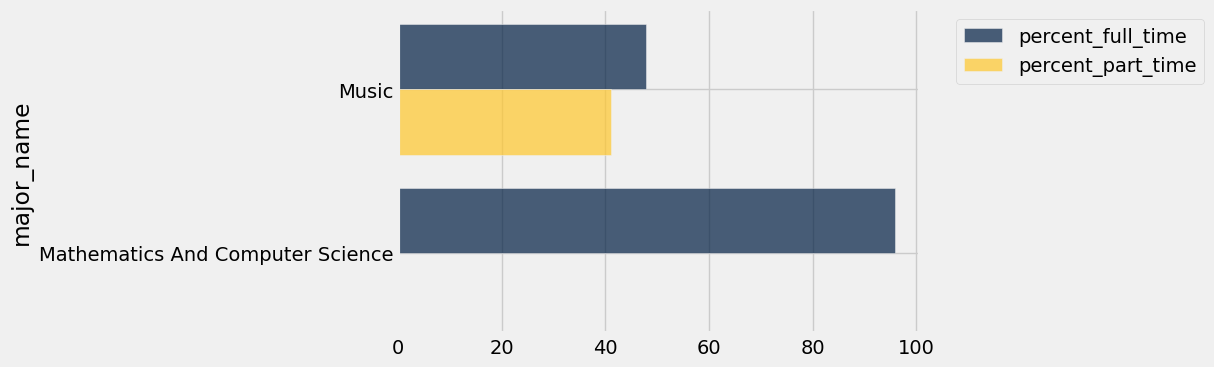

In [ ]:
art_eng.barh("major_name")

Mathematics And Computer Science has a high discrepancy between full time and part time employment, where 0% are part-time workers and 96% of college grads are more likely to get a full-time employed job than a part-time(the other 4% are unemployed). Music has a small difference between full-time and part-time employment, so its not as significant as Mathematics and Computer Science. College grads majoring in Music have almost the same likelihood of getting part-time or full-time employment. Although the Music difference was not that significant, we can learn a lot from the Mathematics and Computer Science bar graph. Through further analysis, we could see the sex demographics of the highest employed and full-time majors and then the highest unemployed and part-time majors.

###Question 3
What is the correlation between the sex demographics of majors and low-wage jobs?

I will create a filtered table with only the men, women, total, and low-wage jobs columns to answer this question.

In [ ]:
sex_demographics_table = cleaned_table.select("men", "women", "total", "low_wage_jobs").sort("low_wage_jobs", True)
sex_demographics_table

men,women,total,low_wage_jobs
86648,307087,393735,48207
173809,156118,329927,32395
111762,168947,280709,28339
78857,126354,205211,27968
70619,143377,213996,27440
132238,102352,234590,27320
58227,136446,194673,26503
93880,88741,182621,19803
80231,72593,152824,18404
78253,63698,141951,16839


I applied the helper function from earlier to the women/total and men over total to get the  percentages of the men and women the make up the total.

In [ ]:
sex_ratio = sex_demographics_table.with_column("percent_women",
                                               sex_demographics_table.apply(ratio_employed,
                                                                            "total", "women"))
sex_ratio_both = sex_ratio.with_column("percent_men",
                                       sex_ratio.apply(ratio_employed,
                                                       "total", "men"))
sex_ratio_both

men,women,total,low_wage_jobs,percent_women,percent_men
86648,307087,393735,48207,77.9933,22.0067
173809,156118,329927,32395,47.319,52.681
111762,168947,280709,28339,60.1858,39.8142
78857,126354,205211,27968,61.5727,38.4273
70619,143377,213996,27440,66.9999,33.0001
132238,102352,234590,27320,43.6302,56.3698
58227,136446,194673,26503,70.0898,29.9102
93880,88741,182621,19803,48.593,51.407
80231,72593,152824,18404,47.501,52.499
78253,63698,141951,16839,44.8732,55.1268


So far, we can tell that there might be a correlation between the sex demographics of majors and if they got low paying jobs. In the first 10 rows of the highest amount of low paying jobs, 44-77% of women make up the low paying jobs while only 22-55% of men make up the low paying jobs.

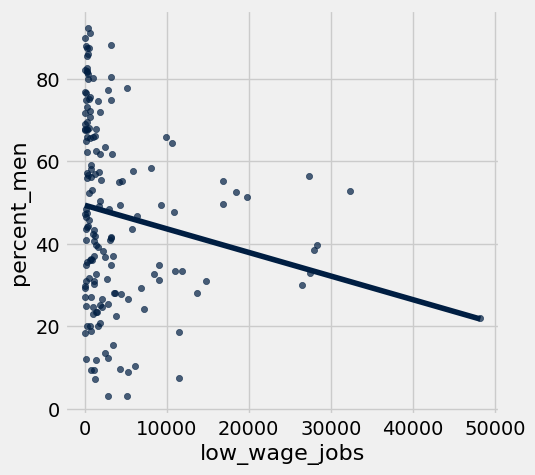

In [ ]:
sex_ratio_both.scatter("low_wage_jobs", "percent_men", fit_line = True)

This scatterplot has a decreasing line of best fit, indicating that as the number of people in low wage jobs increases, the percentage of men decreases.

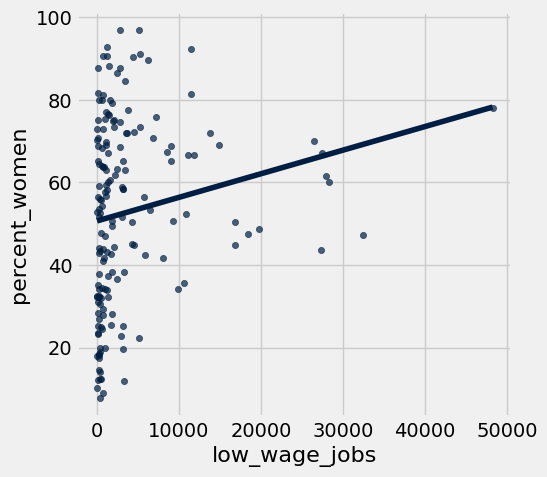

In [ ]:
sex_ratio_both.scatter("low_wage_jobs", "percent_women", fit_line = True)

This scatterplot has a positively increasing line of best fit, indicating that as the number of people in low wage jobs increases, the percentage of women increases. This results show a positive correlation between the women in majors and the amount of them who get low wage jobs.

Women tend to be in more low wage jobs than men.

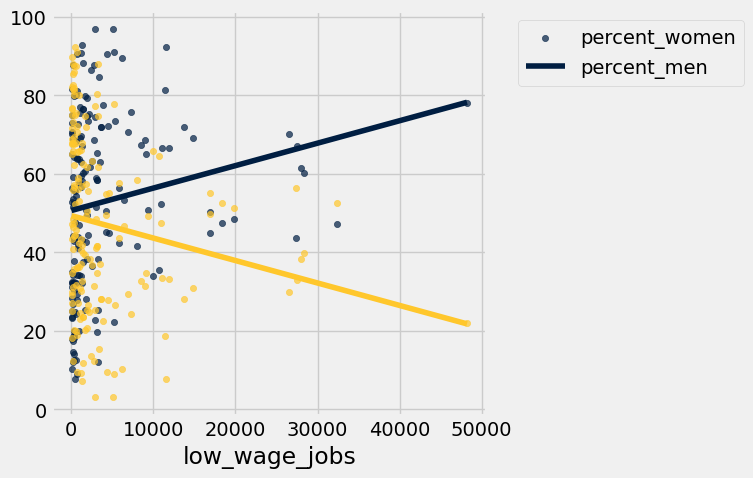

In [ ]:
sex_ratio_both.scatter("low_wage_jobs", ["percent_women", "percent_men"], fit_line = True)

This graph shows the difference between the amount of men and women that get low wage jobs. There are more women that make up the low wage jobs than men.

Note: The blue line actually represents percent_women, yellow line represents percent_men.

###Question 4
Which major has the greatest amount of non-college jobs?

I will create a filtered table with major type, college jobs, and non college jobs.

In [ ]:
non_college_job_table = cleaned_college_grads.select("major_type", "college_jobs", "non_college_jobs").sort("non_college_jobs", True)
non_college_job_table

major_type,college_jobs,non_college_jobs
Business,148538,496570
Humanities & Liberal Arts,192650,276532
Social Science,113960,190246
Communications & Journalism,86556,172992
Psychology & Social Work,164305,169366
Arts,94785,163720
Biology & Life Science,151233,127182
Education,338713,121761
Health,245441,110496
Industrial Arts & Consumer Services,57200,104620


I will create a % of non college jobs over the total to accurately see how many people have non college jobs.

In [ ]:
def helper_jobs_column(num1: int, num2: int) -> int:
    """This takes in a number and divides it by the sum of two numbers."""
    return (num1 / (num1 + num2)) * 100

percent_non_college_jobs = non_college_job_table.with_column("%ncj/total",
                                                        non_college_job_table.apply(helper_jobs_column,
                                                                                    "non_college_jobs", "college_jobs"))

percent_non_college_jobs.show()

major_type,college_jobs,non_college_jobs,%ncj/total
Business,148538,496570,76.9747
Humanities & Liberal Arts,192650,276532,58.9392
Social Science,113960,190246,62.5385
Communications & Journalism,86556,172992,66.6513
Psychology & Social Work,164305,169366,50.7584
Arts,94785,163720,63.3334
Biology & Life Science,151233,127182,45.6807
Education,338713,121761,26.4425
Health,245441,110496,31.0437
Industrial Arts & Consumer Services,57200,104620,64.6521


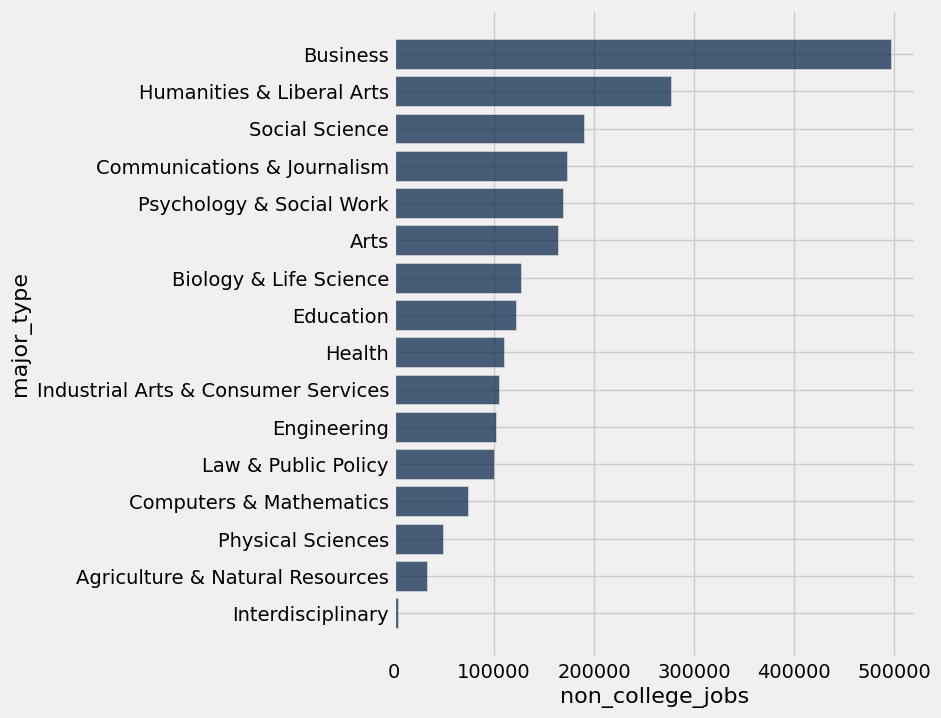

In [ ]:
percent_non_college_jobs.barh("major_type", "non_college_jobs")

This shows that Business major college grads have the largest number of non-college jobs.

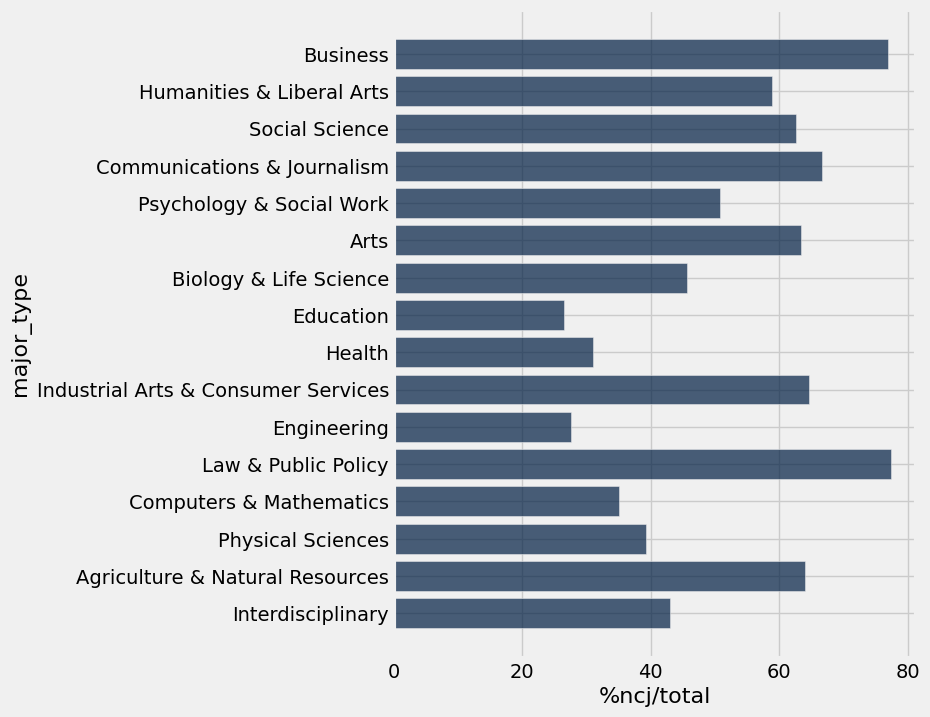

In [ ]:
percent_non_college_jobs.barh("major_type", "%ncj/total")

Out of the total number of college and non-college jobs, Law and Public Policy majors still have the largest percent of non_college_jobs.

References:

https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

http://www.data8.org/datascience/index.html